<a href="https://colab.research.google.com/github/TOBEKOWN/Big-Data-Projects-/blob/main/proj3_Data_Analysis_using_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
 !wget https://drive.google.com/drive/folders/1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim


--2023-01-04 01:40:17--  https://drive.google.com/drive/folders/1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim
Resolving drive.google.com (drive.google.com)... 209.85.234.113, 209.85.234.138, 209.85.234.101, ...
Connecting to drive.google.com (drive.google.com)|209.85.234.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim.1’

1ZhV5LxuRBYiD81HJHQ     [  <=>               ] 237.55K  1.05MB/s    in 0.2s    

2023-01-04 01:40:18 (1.05 MB/s) - ‘1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim.1’ saved [243251]



Data Analysis using Pyspark

### Let's mount the google drive 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls /content/drive/MyDrive

'2021-09-12 (12).png'
 20210925154631_IMG_8127.JPG
 20-46-12.mp4
 21-25-57.mp4
'2-2 RESULTS - CSE A (File responses)'
'2-2 RESULTS - CSE A (Responses).gsheet'
'2nd tcs certificate (1).pdf'
'2nd tcs certificate.pdf'
'4-1 RESULTS - CSE A.gsheet'
'4th year pictures'
 61f69e86cebad30f70a798bb.png
'AAC Student Template (1) (1).pptx'
 ACFrOgA7Rz03R-Yqep0TFyk4L9LuIutpM2qvA_zszPSYEQYvSGJ8k589rGPlJ0YHca6YizP1o0LNJhwfMJniuCP1ghARKH63-_DtscfRcmZhDnCRy0LPigJ2WljQh1cmiPTZAxyBv7t9lrsS2G3H.pdf
'Adobe Scan 28 Jan 2022.pdf'
'Ai mid-2.gdoc'
 asj.gsheet
'Bday pics'
'CA Letter - Charitha Dakavarapu .pdf'
'Certificate (1).png'
 Certificate226.jpg
'Certificate (2).png'
'Certificate (3).png'
'Certificate (4).png'
'Certificate for CHARITHA DAKAVARAPU for _Independence Day_.pdf'
'Certificate for CHARITHA DAKAVARAPU for "Independence Day".pdf'
'Certificate for Charitha Dakavarapu  for _National Level E-Quiz on Ge..._.pdf'
'Certificate for Charitha Dakavarapu  for "National Level E-Quiz on Ge...".pdf'
"Certifica

# Task 1 : 
Installing pyspark module

In [7]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark


Importing the modules 

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct 
import matplotlib.pyplot as plts

creating spark session

In [9]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [10]:
listenings_csv_path = '/content/drive/MyDrive/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listenings_csv_path) 

In [11]:
!ls

1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim    drive	  spark-3.1.1-bin-hadoop3.2
1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim.1  sample_data  spark-3.1.1-bin-hadoop3.2.tgz


let's check the data:

In [12]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [13]:
 listening_df = listening_df.drop('date') # to remove a cloumn

drop the null rows:

*   find the mean value and replace the null vlaues
*   remove the values



In [14]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [15]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the schema: 

In [16]:
shape = (listening_df.count(), len(listening_df.columns))

let's see the shape of our dataframe: 

In [17]:
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [18]:
q0 = listening_df.select('artist', 'track')
q0.show(10)

+------------+--------------------+
|      artist|               track|
+------------+--------------------+
|    Jessie J|           Price Tag|
|    Jessie J|Price Tag (Acoust...|
|       Robyn|Be Mine! (Ballad ...|
|       Kelis|            Acapella|
|   The Tease|   I'm Not Invisible|
|    MSTRKRFT|Bounce (Feat NORE...|
|     Rihanna|Don't Stop The Mu...|
|   Meshuggah|               ObZen|
|      Gojira|   Yama's Messengers|
|Napalm Death|On the Brink of E...|
+------------+--------------------+
only showing top 10 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [19]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show(5)

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
+-----------+--------------------+-------+--------------------+
only showing top 5 rows



**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***



*   step 1= filter by artist name
*   step 2= group by users

*   step 3= count aggregate
*   step 4 = order in descending order










In [20]:
q2 = listening_df.select('user_id').filter(listening_df.artist =='Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



artist wise and track wise -count the number of fans

In [21]:
q3 = listening_df.select('artist','track').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 3381|
|Arctic Monkeys| Do I Wanna Know?| 2865|
|      Bon Iver|      Skinny Love| 2836|
|          Zayn|       PILLOWTALK| 2701|
|   The Killers|    Mr Brightside| 2690|
|       Rihanna|             Work| 2646|
|      Bastille|          Pompeii| 2606|
|Mumford & Sons|  Little Lion Man| 2520|
|Mumford & Sons|         The Cave| 2485|
| Justin Bieber|What Do You Mean?| 2481|
+--------------+-----------------+-----+



**Query #3:**

find top 10 famous tracks 
1. group by title
2. count the number of listeners
3. order by descending oder

In [22]:
q3 = listening_df.select('artist','track').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 3381|
|Arctic Monkeys| Do I Wanna Know?| 2865|
|      Bon Iver|      Skinny Love| 2836|
|          Zayn|       PILLOWTALK| 2701|
|   The Killers|    Mr Brightside| 2690|
|       Rihanna|             Work| 2646|
|      Bastille|          Pompeii| 2606|
|Mumford & Sons|  Little Lion Man| 2520|
|Mumford & Sons|         The Cave| 2485|
| Justin Bieber|What Do You Mean?| 2481|
+--------------+-----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [23]:
q4 = listening_df.select('artist','track').filter(listening_df.artist == 'Rihanna').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [24]:
q5 = listening_df.select('artist','album').groupby('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [25]:
genre_csv_path = '/content/drive/MyDrive/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_csv_path)

In [26]:
!ls -1

1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim
1ZhV5LxuRBYiD81HJHQTheQawXZ5MkPim.1
drive
sample_data
spark-3.1.1-bin-hadoop3.2
spark-3.1.1-bin-hadoop3.2.tgz


let's check the data

In [27]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [28]:
data = listening_df.join(genre_df, how = 'inner', on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [29]:
q6 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [30]:
q7 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [31]:
q8_1 = data.select('user_id', 'genre').groupby('user_id', 'genre').agg(count('*').alias('count'))
q8_1.show()

+---------------+--------------------+-----+
|        user_id|               genre|count|
+---------------+--------------------+-----+
|          _0015|     psychedelic pop|    3|
|        01Green|          Maty Noyes|    1|
|      01srainey|            Big Sean|    2|
|      03swalker|                soul|    4|
|        0502008|       Keys N Krates|    2|
|       07berobe|national socialis...|   14|
|       07berobe|        gothic metal|    8|
|          0rdos|              celtic|    1|
|     0xenolith0|       drum and bass|    1|
|10bobrevolution|         000 Fathers|    4|
| 11shadesofgrey|          electronic|    6|
| 11shadesofgrey|             baroque|    1|
|      1337fatal|                jazz|   14|
|        14M5K0T|                jazz|   70|
|          16-19| June Carter & Me...|    1|
|          16-19| Kanye West & Pau...|    1|
|   1888Franklin|               metal|   17|
|           1936|       Woody Jackson|    1|
|       19nick81|             minimal|   42|
|   1Chord

In [32]:
q8_2 = q8_1.groupby('user_id').agg(max(struct(col('count'), col('genre'))).alias('max')).select(col('user_id'), col('max.genre'))
q8_2.show()

+---------------+-----------------+
|        user_id|            genre|
+---------------+-----------------+
|        -Gemma-|      british pop|
|        247flix|         synthpop|
|     A3sahaettr|            metal|
|        AYFBlog|       indie rock|
|  AdamMcSpaddam|             rock|
|        Alukarl|      death metal|
|       Ambalina|              pop|
|        AndyEgg|             rock|
| AngerisaGift14|             rock|
|      Anndddyyy|             rock|
|     BasilBrush|             rock|
|     BernieLick|             rock|
|      Big_Tiger|            indie|
|          Birks|singer-songwriter|
|         BolaJA|             rock|
|        Boone92|        metalcore|
|CameronWhittall|              pop|
|        Ceolmor|       electronic|
| CheeseMonkey91|              emo|
|  Chilled-Lemon|             rock|
+---------------+-----------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [33]:
q9 = genre_df.select('genre').filter((col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop')).groupby('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [34]:
q9_list = q9.collect()
print(q9_list)

[Row(genre='pop', count=6960), Row(genre='hip hop', count=4288), Row(genre='metal', count=1854), Row(genre='rock', count=9066)]


In [35]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [39]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

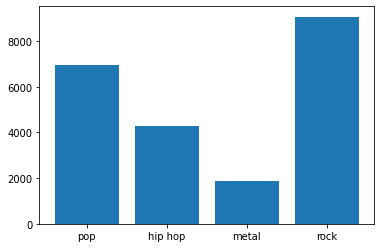

In [45]:
plts.bar(labels, counts)